In [237]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans


READ DATA

In [238]:
df =pd.read_csv('dataset.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


  DROP THE UN-USED COLUMN (ID)

In [239]:
df.drop('CustomerID', axis =1, inplace =True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


 CHANGE THE STRING VALUE IN COLUMN TO NUMRICAL

In [240]:
df.loc[df["Gender"]=="Male", "Gender"]=0
df.loc[df["Gender"]=="Female", "Gender"]=1
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


CHECK IF ANY MISSING VALUES 

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [242]:
df.nunique()

Gender                     2
Age                       51
Annual Income (k$)        64
Spending Score (1-100)    84
dtype: int64

 SHOW THE MATHMATICAL INFO

In [243]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


CHECK IF ANY DUPLICATE

In [244]:
len(df[df.duplicated()])

0

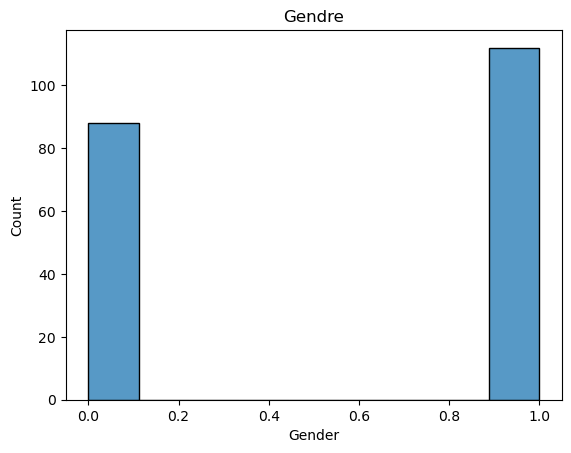

In [245]:
plt.Figure(figsize=(12,5))
plt.title("Gendre")
sns.histplot(df['Gender'])
plt.show()

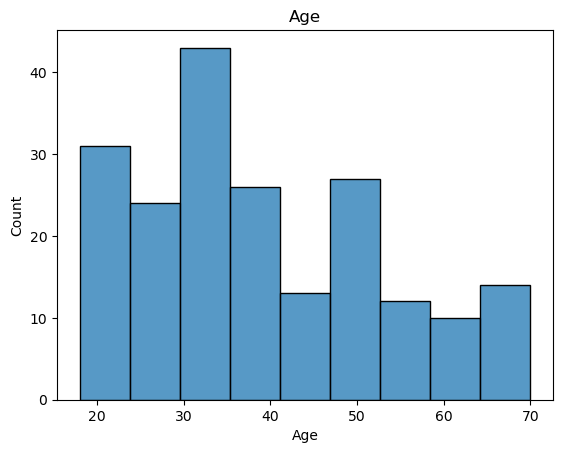

In [246]:
plt.Figure(figsize=(12,5))
plt.title("Age")
sns.histplot(df['Age'])
plt.show()

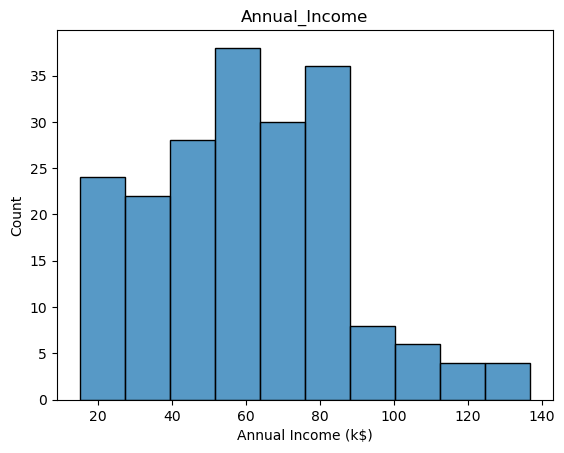

In [247]:
plt.Figure(figsize=(12,5))
plt.title("Annual_Income")
sns.histplot(df['Annual Income (k$)'])
plt.show()

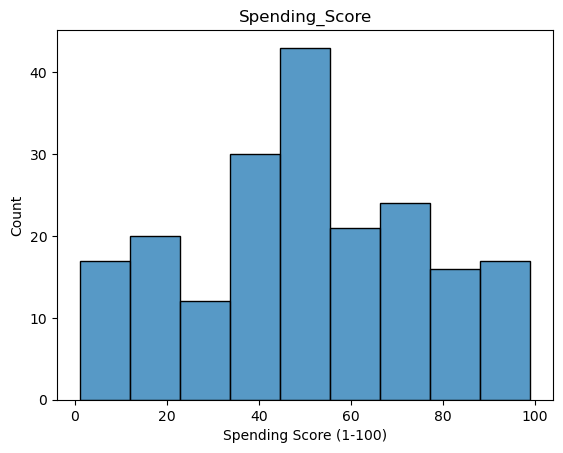

In [248]:
plt.Figure(figsize=(12,5))
plt.title("Spending_Score")
sns.histplot(df['Spending Score (1-100)'])
plt.show()

CHECK IF ANY  OTHER UN-USED COLUMN

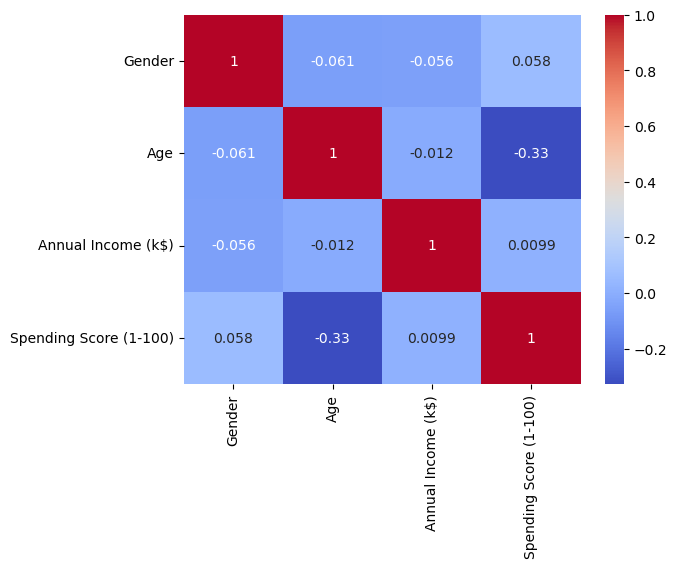

In [249]:
corr=df.corr()
sns.heatmap(corr , annot=True, cmap='coolwarm')
plt.show()

CREAT ANOTHER DATA_FRAME TO MAKE CHANGE ON

In [250]:
df_AS=df[['Annual Income (k$)','Spending Score (1-100)']]
df_AS.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


VISUALIZE THE SCATTER TO SHOW THE DISTREBUTION OF THE POINTS

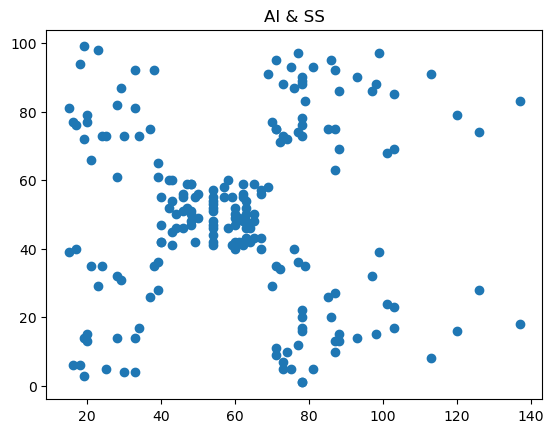

In [251]:
plt.scatter(df_AS['Annual Income (k$)'], df_AS['Spending Score (1-100)'])
plt.title('AI & SS')
plt.show()

SHOW THE ERRORS VALUE

In [252]:
features = df[['Annual Income (k$)', 'Spending Score (1-100)']]
inertia = []
K = range(1, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(features)
    inertia.append(km.inertia_)

print(inertia)

[269981.28, 183653.32894736843, 106348.37306211122, 73880.64496247195, 44448.4554479337, 40825.16946386947, 33642.57922077923, 26686.83778518779, 24766.471609793443, 23103.122085983916]


d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

ELBOW METHOD TO DETRMINE THE 'K'

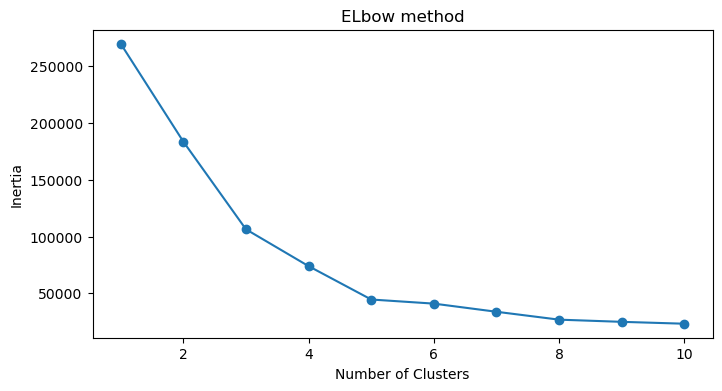

In [253]:
plt.figure(figsize=(8, 4))
plt.plot(range(1,11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('ELbow method')
plt.show()

DEVIDED EACH ROW TO THE FIT CLUSTER

In [254]:
ks= KMeans(n_clusters=5)
ks.fit(df_AS)
y=ks.predict(df_AS)
df_AS['label']=y
df_AS.head()

d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\MANSI\AppData\Local\Temp\ipykernel_1872\3264283592.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AS['label']=y


,Annual Income (k$),Spending Score (1-100),label
0,15,39,0
1,15,81,4
2,16,6,0
3,16,77,4
4,17,40,0


In [255]:
print(y)

[0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 1 0 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 3 2 3 1 3 2 3 2 3 1 3 2 3 2 3 2 3 2 3 1 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3]


SHOE THE NO.OF_CLUSTER AND THE CENTROIDS OF EACH ONE

In [256]:
print(ks.n_clusters)

print(ks.cluster_centers_)


5
[[26.30434783 20.91304348]
 [55.2962963  49.51851852]
 [88.2        17.11428571]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]]


In [257]:
ks.cluster_centers_[:,0],ks.cluster_centers_[:,1]

(array([26.30434783, 55.2962963 , 88.2       , 86.53846154, 25.72727273]),
 array([20.91304348, 49.51851852, 17.11428571, 82.12820513, 79.36363636]))

VISUALIZE EACH CLUSTER WITH DIFF. COLOR AND PUT IT'S CENTER

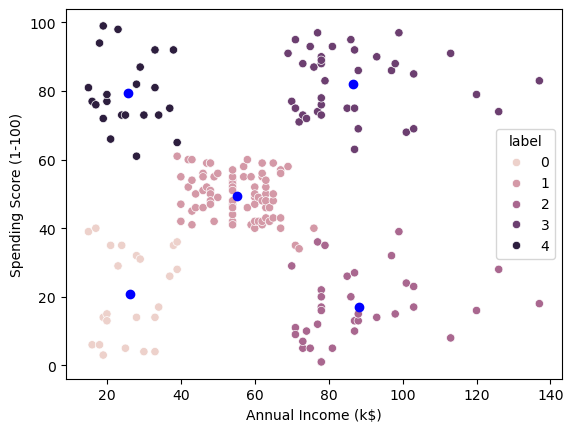

In [258]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)', data=df_AS, hue='label')
plt.scatter(ks.cluster_centers_[:,0],ks.cluster_centers_[:,1], c='blue',label='label')
plt.show()

SEPARATE EACH CLUSTER WITH IT'S POINTS

In [259]:
cluster0=df_AS[df_AS['label']==0]
print(cluster0)
cluster0.describe()

    Annual Income (k$)  Spending Score (1-100)  label
0                   15                      39      0
2                   16                       6      0
4                   17                      40      0
6                   18                       6      0
8                   19                       3      0
10                  19                      14      0
12                  20                      15      0
14                  20                      13      0
16                  21                      35      0
18                  23                      29      0
20                  24                      35      0
22                  25                       5      0
24                  28                      14      0
26                  28                      32      0
28                  29                      31      0
30                  30                       4      0
32                  33                       4      0
34                  33      

,Annual Income (k$),Spending Score (1-100),label
count,23.000000,23.000000,23.0
mean,26.304348,20.913043,0.0
std,7.893811,13.017167,0.0
min,15.000000,3.000000,0.0
25%,19.500000,9.500000,0.0
50%,25.000000,17.000000,0.0
75%,33.000000,33.500000,0.0
max,39.000000,40.000000,0.0


In [260]:
cluster1=df[df_AS['label']==1]
print(cluster1)
cluster1.describe()

    Gender  Age  Annual Income (k$)  Spending Score (1-100)
43       1   31                  39                      61
46       1   50                  40                      55
47       1   27                  40                      47
48       1   29                  40                      42
49       1   31                  40                      42
..     ...  ...                 ...                     ...
121      1   38                  67                      40
122      1   40                  69                      58
126      0   43                  71                      35
132      1   25                  72                      34
142      1   28                  76                      40

[81 rows x 4 columns]


,Age,Annual Income (k$),Spending Score (1-100)
count,81.000000,81.000000,81.000000
mean,42.716049,55.296296,49.518519
std,16.447822,8.988109,6.530909
min,18.000000,39.000000,34.000000
25%,27.000000,48.000000,44.000000
50%,46.000000,54.000000,50.000000
75%,54.000000,62.000000,55.000000
max,70.000000,76.000000,61.000000


In [261]:
cluster2=df[df_AS['label']==2]
print(cluster2)
cluster2.describe()

    Gender  Age  Annual Income (k$)  Spending Score (1-100)
124      1   23                  70                      29
128      0   59                  71                      11
130      0   47                  71                       9
134      0   20                  73                       5
136      1   44                  73                       7
138      0   19                  74                      10
140      1   57                  75                       5
144      0   25                  77                      12
146      0   48                  77                      36
148      1   34                  78                      22
150      0   43                  78                      17
152      1   44                  78                      20
154      1   47                  78                      16
156      0   37                  78                       1
158      0   34                  78                       1
160      1   56                  79     

,Age,Annual Income (k$),Spending Score (1-100)
count,35.000000,35.000000,35.000000
mean,41.114286,88.200000,17.114286
std,11.341676,16.399067,9.952154
min,19.000000,70.000000,1.000000
25%,34.000000,77.500000,10.000000
50%,42.000000,85.000000,16.000000
75%,47.500000,97.500000,23.500000
max,59.000000,137.000000,39.000000


In [262]:
cluster3=df[df_AS['label']==3]
print(cluster3)
cluster3.describe()

    Gender  Age  Annual Income (k$)  Spending Score (1-100)
123      0   39                  69                      91
125      1   31                  70                      77
127      0   40                  71                      95
129      0   38                  71                      75
131      0   39                  71                      75
133      1   31                  72                      71
135      1   29                  73                      88
137      0   32                  73                      73
139      1   35                  74                      72
141      0   32                  75                      93
143      1   32                  76                      87
145      0   28                  77                      97
147      1   32                  77                      74
149      0   34                  78                      90
151      0   39                  78                      88
153      1   38                  78     

,Age,Annual Income (k$),Spending Score (1-100)
count,39.000000,39.000000,39.000000
mean,32.692308,86.538462,82.128205
std,3.728650,16.312485,9.364489
min,27.000000,69.000000,63.000000
25%,30.000000,75.500000,74.500000
50%,32.000000,79.000000,83.000000
75%,35.500000,95.000000,90.000000
max,40.000000,137.000000,97.000000


In [263]:
cluster4=df[df_AS['label']==4]
print(cluster4)
cluster4.describe()

   Gender  Age  Annual Income (k$)  Spending Score (1-100)
1       0   21                  15                      81
3       1   23                  16                      77
5       1   22                  17                      76
7       1   23                  18                      94
9       1   30                  19                      72
11      1   35                  19                      99
13      1   24                  20                      77
15      0   22                  20                      79
17      0   20                  21                      66
19      1   35                  23                      98
21      0   25                  24                      73
23      0   31                  25                      73
25      0   29                  28                      82
27      0   35                  28                      61
29      1   23                  29                      87
31      1   21                  30                      

,Age,Annual Income (k$),Spending Score (1-100)
count,22.000000,22.000000,22.000000
mean,25.272727,25.727273,79.363636
std,5.257030,7.566731,10.504174
min,18.000000,15.000000,61.000000
25%,21.250000,19.250000,73.000000
50%,23.500000,24.500000,77.000000
75%,29.750000,32.250000,85.750000
max,35.000000,39.000000,99.000000


ADD THE LABEL TO THE ORIGINAL DATA)FRAME

In [264]:
df['label']=y
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,0,19,15,39,0
1,0,21,15,81,4
2,1,20,16,6,0
3,1,23,16,77,4
4,1,31,17,40,0


In [265]:
z=df.label
print(z)

0      0
1      4
2      0
3      4
4      0
      ..
195    3
196    2
197    3
198    2
199    3
Name: label, Length: 200, dtype: int32
